In [3]:
%cd /home/danbi/userdata/DANBI/gugakwon/SejongMusic/
%load_ext autoreload
%autoreload 2

/home/danbi/userdata/DANBI/gugakwon/SejongMusic


In [31]:
from omegaconf import OmegaConf

from sejong_music.jg_code import JeongganDataset, JeongganTokenizer, ABCDataset, ABCTokenizer
from sejong_music.model_zoo import JeongganTransSeq2seq
from sejong_music.inference import JGInferencer, JGSimpleInferencer, ABCInferencer
from sejong_music.jg_to_staff_converter import JGToStaffConverter
from sejong_music.constants import DURATION
from sejong_music.jg_to_staff_converter import ABCtoGenConverter
from sejong_music.full_inference import Generator

config = OmegaConf.load('wandb/run-20240408_231038-rohnkjrd/files/checkpoints/config.yaml')
dataset = ABCDataset(is_valid=True, is_pos_counter=True)
tokenizer = ABCTokenizer(None, None, json_fn='wandb/run-20240408_231038-rohnkjrd/files/checkpoints/tokenizer_vocab.json')
dataset.tokenizer = tokenizer
model = JeongganTransSeq2seq(tokenizer, config.model)
inferencer = ABCInferencer(model, is_condition_shifted=True, is_orch=True)
# inferencer = JGInferencer(model, is_condition_shifted=True, is_orch=True)
generator = Generator(config=None,
                          model=model,
                          inferencer=inferencer, 
                          is_abc = True,
                          )
import torch
state_dict = torch.load('wandb/run-20240408_231038-rohnkjrd/files/checkpoints/inst_0/best_model.pt', map_location='cpu')
model.load_state_dict(state_dict)
model.cuda()
model.eval()
None

['pad', 'start', 'end', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 21, 23, Fraction(1, 6), Fraction(1, 4), Fraction(1, 3), Fraction(1, 2), Fraction(7, 12), Fraction(2, 3), Fraction(3, 4), Fraction(5, 6), Fraction(7, 6), Fraction(4, 3), Fraction(3, 2), Fraction(5, 3), Fraction(7, 4), Fraction(11, 6), Fraction(7, 3), Fraction(5, 2), Fraction(8, 3), Fraction(17, 6), Fraction(10, 3), Fraction(11, 3), Fraction(23, 6), Fraction(13, 3), Fraction(9, 2), Fraction(14, 3), Fraction(17, 3), Fraction(35, 6), Fraction(19, 3), Fraction(20, 3), Fraction(23, 3), Fraction(59, 6), Fraction(38, 3), Fraction(7, 2), Fraction(11, 4), Fraction(17, 2), Fraction(13, 1), Fraction(15, 4), Fraction(19, 4), Fraction(11, 2), Fraction(5, 4), Fraction(15, 2), Fraction(13, 6), Fraction(19, 6), Fraction(29, 3), Fraction(32, 3), Fraction(44, 3), Fraction(23, 2), Fraction(9, 4), Fraction(31, 6), Fraction(29, 6), Fraction(34, 3), Fraction(22, 3), Fraction(16, 3), Fraction(53, 6), Fraction(77, 6), '하하배임', '하배황', '하배태', '하배중', '하

In [28]:
output_str = generator.inference_from_xml('music_score/cph_generated.musicxml', ['geomungo', 'gayageum', 'ajaeng', 'haegeum', 'piri', 'daegeum'])

None of the note[1] is matched while note[2]==0: ('하배임', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('배황', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('배중', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('하배태', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('배태', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('배황', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('배중', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('배태', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('배황', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('배중', 0.0, 0.0)
None of the note[1] is matched while note[2]==0: ('배임', 0.0, 0.0)
['geomungo']


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

[[':0', 'gayageum'], ['태', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['중', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['태', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['태', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['태', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['\n', 'gayageum'], [':0', 'gayageum'], ['배임'

  0%|          | 0/3000 [00:00<?, ?it/s]

[[':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], [

  0%|          | 0/3000 [00:00<?, ?it/s]

[[':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], ['',

  0%|          | 0/3000 [00:00<?, ?it/s]

[[':0', 'gayageum'], ['배중', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], [':2', 'gayageum'], ['배남', 'gayageum'], [':8', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayag

  0%|          | 0/3000 [00:00<?, ?it/s]

[[':0', 'gayageum'], ['태', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['중', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['태', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['태', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['중', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['태', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['태', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배중', 'gayageum'], ['|', 'ga

  0%|          | 0/3000 [00:00<?, ?it/s]

[[':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['태

  0%|          | 0/3000 [00:00<?, ?it/s]

[[':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배남', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['배임', 'gayageum'], ['|', 'gayageum'], ['', 'gayageum'], ['|', 'gayageum'], [':0', 'gayageum'], ['황', 'gayageum'], [

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [57]:
src, tgt, shifted_tgt = dataset[13]

source, output, _ = inferencer.inference(src, inst_name='daegeum')


  0%|          | 0/3000 [00:00<?, ?it/s]

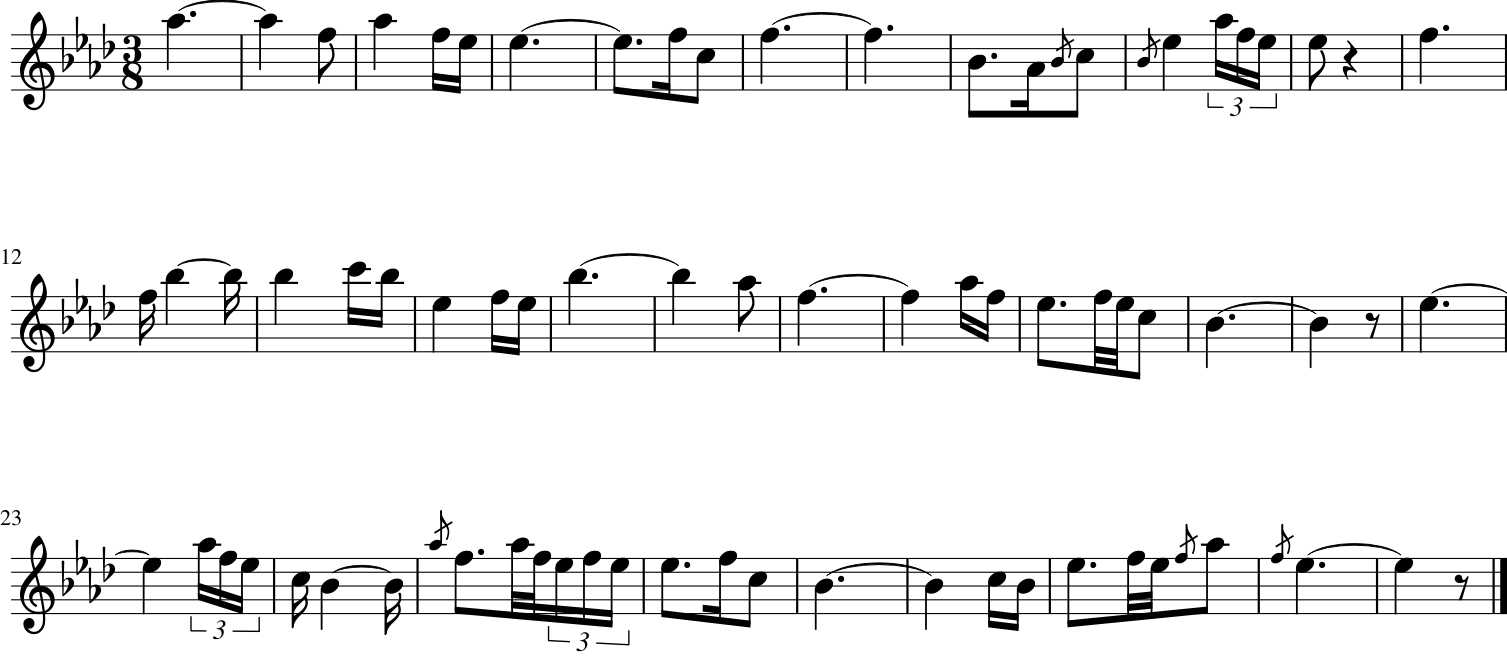

In [58]:
converter = JGToStaffConverter()
note, score = converter([x[0] for x in output])
score.show()

In [35]:
output = [x[0] for x in output]

In [37]:
decoder = ABCtoGenConverter()
decoder(output)

''

In [19]:
abcset = ABCDataset(is_valid=False)
src = abcset[0][0]

In [89]:
from fractions import Fraction
decoded_src = abcset.tokenizer.decode(src)
first_duration_list = []
second_duration_list = []
stand = True
for note in decoded_src:
  if note[0] == '\n' and not stand:
    break
  if note[0] == '\n':
    stand = False
  if note[0] in DURATION and stand:
    first_duration_list.append(Fraction(note[0]))
  if note[0] in DURATION and not stand:
    second_duration_list.append(Fraction(note[0]))

sum(first_duration_list), sum(second_duration_list)

(Fraction(5, 1), Fraction(16, 1))

In [ ]:
from fractions import Fraction
decoded_src = abcset.tokenizer.decode(src)
flattend = [note[0] for note in decoded_src[1:]]
result = ' '.join(map(str, flattend)).split('\n')
first_measure, second_measure = result[0], result[1]

note_duration = []
for note in first_measure.split(' '):
  print(note)
  if Fraction(note) in DURATION:
    note_duration.append(Fraction(note))
sum(note_duration)

In [ ]:
import torch
state_dict = torch.load('wandb/run-20240405_233133-1bp5awjm/files/checkpoints/inst_0/best_model.pt', map_location='cpu')
model.load_state_dict(state_dict)
model.cuda()
model.eval()
None

In [21]:
src

tensor([[  1,   1,   1,   1, 183],
        [ 89, 188, 196, 216, 184],
        [131, 188, 196, 216, 184],
        [  4, 188, 196, 216, 184],
        [ 88, 188, 197, 216, 184],
        [  5, 188, 197, 216, 184],
        [ 84, 188, 199, 216, 184],
        [ 19, 188, 199, 216, 184],
        [ 83, 190, 199, 216, 184],
        [ 28, 190, 199, 216, 184],
        [106, 188, 196, 216, 184],
        [ 89, 188, 196, 217, 184],
        [131, 188, 196, 217, 184],
        [  4, 188, 196, 217, 184],
        [ 88, 188, 197, 217, 184],
        [ 20, 188, 197, 217, 184],
        [176, 189, 197, 217, 184],
        [ 20, 189, 197, 217, 184],
        [ 88, 188, 198, 217, 184],
        [ 22, 188, 198, 217, 184],
        [ 92, 193, 198, 217, 184],
        [165, 193, 198, 217, 184],
        [ 19, 193, 198, 217, 184],
        [ 93, 188, 199, 217, 184],
        [  4, 188, 199, 217, 184],
        [ 92, 188, 200, 217, 184],
        [ 10, 188, 200, 217, 184],
        [ 89, 188, 207, 217, 184],
        [131, 188, 2

In [20]:
model.tokenizer.decode(src)

[['start', 'start', 'start', 'start', 'piri'],
 ['태', 'beat:0', 'jg:0', 'gak:0', 'haegeum'],
 ['나니로', 'beat:0', 'jg:0', 'gak:0', 'haegeum'],
 [1, 'beat:0', 'jg:0', 'gak:0', 'haegeum'],
 ['황', 'beat:0', 'jg:1', 'gak:0', 'haegeum'],
 [2, 'beat:0', 'jg:1', 'gak:0', 'haegeum'],
 ['배임', 'beat:0', 'jg:3', 'gak:0', 'haegeum'],
 [Fraction(1, 3), 'beat:0', 'jg:3', 'gak:0', 'haegeum'],
 ['배중', 'beat:1/3', 'jg:3', 'gak:0', 'haegeum'],
 [Fraction(5, 3), 'beat:1/3', 'jg:3', 'gak:0', 'haegeum'],
 ['\n', 'beat:0', 'jg:0', 'gak:0', 'haegeum'],
 ['태', 'beat:0', 'jg:0', 'gak:1', 'haegeum'],
 ['나니로', 'beat:0', 'jg:0', 'gak:1', 'haegeum'],
 [1, 'beat:0', 'jg:0', 'gak:1', 'haegeum'],
 ['황', 'beat:0', 'jg:1', 'gak:1', 'haegeum'],
 [Fraction(1, 2), 'beat:0', 'jg:1', 'gak:1', 'haegeum'],
 ['요성표', 'beat:1/2', 'jg:1', 'gak:1', 'haegeum'],
 [Fraction(1, 2), 'beat:1/2', 'jg:1', 'gak:1', 'haegeum'],
 ['황', 'beat:0', 'jg:2', 'gak:1', 'haegeum'],
 [Fraction(2, 3), 'beat:0', 'jg:2', 'gak:1', 'haegeum'],
 ['중', 'beat:

In [3]:
from sejong_music.jg_code import ABCPiece

piece = ABCPiece('music_score/gen_code/관악영산회상 군악_daegeum_piri_haegeum_ajaeng.txt')

slice_len=4
for part in piece.parts:
  measure_boundary_idx = [0]+ [i+1 for i, cha in enumerate(part) if cha[0] == '\n']
  print(len(measure_boundary_idx))
  cutted_part = [piece.cut(part, measure_boundary_idx, i, i+slice_len) for i in range(len(measure_boundary_idx)-slice_len)]
piece.check_measure_length()
print(piece.is_clean)

AttributeError: 'ABCPiece' object has no attribute 'processed_tokens'

In [52]:
dataset = JeongganDataset(is_valid=True, is_pos_counter=False)
# piece = ABCPiece('music_score/gen_code/관악영산회상 군악_daegeum_piri_haegeum_ajaeng.txt')
# sample = dataset.all_pieces[0]
# sample.sliced_parts_by_inst, sample.sliced_parts_by_measure

In [41]:
'gak1/4'[3:]

'1/4'

In [27]:
tokens = []
for piece in abcset.all_pieces:
  for part in piece.processed_tokens:
    for note in part:
      if type(note[0]) != str:
        tokens.append(note[0])
all_tokens = list(set(tokens))


In [8]:
from fractions import Fraction
from collections import defaultdict, Counter
counter = Counter()
tokens = []
for piece in abcset.all_pieces:
  for part in piece.processed_tokens:
    for note in part:
      tokens.append(note[0])
counter = Counter(tokens)
# draw histogram
import matplotlib.pyplot as plt
dur_list = []
dur_counter = {}
for key, values in counter.items():
  if type(Fraction(key[5:])) != str:
    dur_list.append(key[5:])
    # dur_counter[str(key)] =  values
dur_list = [dur for dur in dur_list if dur]
print(sorted(dur_list))

ValueError: Invalid literal for Fraction: ''

In [97]:
10 in abcset.vocab

False

[['start', 'start', 'start', 'start', 'piri'], ['배황', 'beat:0', 'jg:0', 'gak:0', 'gayageum'], [2, 'beat:0', 'jg:0', 'gak:0', 'gayageum'], ['배황', 'beat:0', 'jg:2', 'gak:0', 'gayageum'], [1, 'beat:0', 'jg:2', 'gak:0', 'gayageum'], ['하배황', 'beat:0', 'jg:3', 'gak:0', 'gayageum'], [1, 'beat:0', 'jg:3', 'gak:0', 'gayageum'], ['배황', 'beat:0', 'jg:4', 'gak:0', 'gayageum'], [1, 'beat:0', 'jg:4', 'gak:0', 'gayageum'], ['\n', 'beat:0', 'jg:0', 'gak:0', 'gayageum'], ['배황', 'beat:0', 'jg:0', 'gak:1', 'gayageum'], [2, 'beat:0', 'jg:0', 'gak:1', 'gayageum'], ['배황', 'beat:0', 'jg:2', 'gak:1', 'gayageum'], [Fraction(2, 3), 'beat:0', 'jg:2', 'gak:1', 'gayageum'], ['배중', 'beat:2/3', 'jg:2', 'gak:1', 'gayageum'], [Fraction(1, 3), 'beat:2/3', 'jg:2', 'gak:1', 'gayageum'], ['배중', 'beat:0', 'jg:3', 'gak:1', 'gayageum'], [2, 'beat:0', 'jg:3', 'gak:1', 'gayageum'], ['배중', 'beat:0', 'jg:5', 'gak:1', 'gayageum'], [1, 'beat:0', 'jg:5', 'gak:1', 'gayageum'], ['하배중', 'beat:0', 'jg:6', 'gak:1', 'gayageum'], [1, 'bea

KeyError: 10

In [31]:
counter = Counter(tokens)
# draw histogram
import matplotlib.pyplot as plt
dur_list = []
dur_counter = {}
for key, values in counter.items():
  if type(key) != str:
    dur_list.append(key)
    # dur_counter[str(key)] =  values
dur_list = [dur for dur in dur_list if dur]
print(sorted(dur_list))
# import matplotlib.pyplot as plt

# # Sample dictionary
# data = dur_counter

# # Extract keys and values from the dictionary
# keys = list(data.keys())
# values = list(data.values())

# # Plotting the histogram
# plt.bar(keys, values)

# # Adding labels and title
# plt.xlabel('Keys')
# plt.ylabel('Values')
# plt.title('Histogram of Dictionary Keys and Values')

# # Display the plot
# plt.show()


[Fraction(1, 6), Fraction(1, 4), Fraction(1, 3), Fraction(1, 2), Fraction(7, 12), Fraction(2, 3), Fraction(3, 4), Fraction(5, 6), 1, Fraction(7, 6), Fraction(4, 3), Fraction(3, 2), Fraction(5, 3), Fraction(7, 4), Fraction(11, 6), 2, Fraction(7, 3), Fraction(5, 2), Fraction(8, 3), Fraction(17, 6), 3, Fraction(10, 3), Fraction(11, 3), Fraction(23, 6), 4, Fraction(13, 3), Fraction(9, 2), Fraction(14, 3), 5, Fraction(17, 3), Fraction(35, 6), Fraction(6, 1), Fraction(19, 3), Fraction(20, 3), Fraction(7, 1), Fraction(23, 3), Fraction(59, 6), Fraction(38, 3)]


In [ ]:
from fractions import Fraction

In [107]:
from sejong_music.constants import POSITION, PITCH, PART
[token for token in Counter(tokens).keys() if type(token) != str]

[2,
 1,
 Fraction(1, 2),
 Fraction(1, 6),
 Fraction(1, 3),
 Fraction(2, 3),
 Fraction(7, 1),
 Fraction(5, 3),
 Fraction(11, 6),
 Fraction(3, 2),
 Fraction(5, 6),
 0,
 Fraction(10, 3),
 Fraction(4, 3),
 Fraction(8, 3),
 Fraction(11, 3),
 Fraction(20, 3),
 Fraction(3, 4),
 Fraction(1, 4),
 Fraction(17, 3),
 None,
 3,
 Fraction(17, 6),
 Fraction(14, 3),
 Fraction(6, 1),
 Fraction(38, 3),
 Fraction(23, 3),
 5,
 4,
 Fraction(7, 3),
 Fraction(7, 4),
 Fraction(7, 12),
 Fraction(5, 2),
 Fraction(9, 2),
 Fraction(13, 3),
 Fraction(7, 6),
 Fraction(23, 6),
 Fraction(35, 6),
 Fraction(59, 6),
 Fraction(19, 3)]

In [28]:
sample.processed_tokens[0]

[['임', 0, 0, 0],
 [2, 0, 0, 0],
 ['니나', 0, 0, 0],
 ['중', 0, 2, 0],
 [1, 0, 2, 0],
 ['태', 0, 3, 0],
 [Fraction(1, 2), 0, 3, 0],
 ['노', Fraction(1, 2), 3, 0],
 [Fraction(1, 6), Fraction(1, 2), 3, 0],
 ['중', Fraction(2, 3), 3, 0],
 [Fraction(1, 3), Fraction(2, 3), 3, 0],
 ['태', 0, 4, 0],
 [Fraction(2, 3), 0, 4, 0],
 ['너녜', 0, 4, 0],
 ['쉼표', Fraction(2, 3), 4, 0],
 [Fraction(1, 3), Fraction(2, 3), 4, 0],
 ['\n', 0, 0, 1],
 ['임', 0, 0, 1],
 [Fraction(1, 6), 0, 0, 1],
 ['청황', Fraction(1, 6), 0, 1],
 [Fraction(1, 3), Fraction(1, 6), 0, 1],
 ['니', Fraction(1, 2), 0, 1],
 [Fraction(1, 6), Fraction(1, 2), 0, 1],
 ['남', Fraction(2, 3), 0, 1],
 [Fraction(1, 3), Fraction(2, 3), 0, 1],
 ['임', 0, 1, 1],
 [Fraction(1, 2), 0, 1, 1],
 ['니', Fraction(1, 2), 1, 1],
 [Fraction(1, 6), Fraction(1, 2), 1, 1],
 ['느나', Fraction(2, 3), 1, 1],
 [Fraction(1, 3), Fraction(2, 3), 1, 1],
 ['반길이표/덧길이표', Fraction(2, 3), 1, 1],
 ['임', 0, 2, 1],
 [Fraction(1, 6), 0, 2, 1],
 ['청황', Fraction(1, 6), 2, 1],
 [Fraction(1, 3),

In [29]:
piece.by_slice_len(sample.processed_tokens[0], 4)

[[['임', 0, 0, 0],
  [2, 0, 0, 0],
  ['니나', 0, 0, 0],
  ['중', 0, 2, 0],
  [1, 0, 2, 0],
  ['태', 0, 3, 0],
  [Fraction(1, 2), 0, 3, 0],
  ['노', Fraction(1, 2), 3, 0],
  [Fraction(1, 6), Fraction(1, 2), 3, 0],
  ['중', Fraction(2, 3), 3, 0],
  [Fraction(1, 3), Fraction(2, 3), 3, 0],
  ['태', 0, 4, 0],
  [Fraction(2, 3), 0, 4, 0],
  ['너녜', 0, 4, 0],
  ['쉼표', Fraction(2, 3), 4, 0],
  [Fraction(1, 3), Fraction(2, 3), 4, 0],
  ['\n', 0, 0, 1],
  ['임', 0, 0, 1],
  [Fraction(1, 6), 0, 0, 1],
  ['청황', Fraction(1, 6), 0, 1],
  [Fraction(1, 3), Fraction(1, 6), 0, 1],
  ['니', Fraction(1, 2), 0, 1],
  [Fraction(1, 6), Fraction(1, 2), 0, 1],
  ['남', Fraction(2, 3), 0, 1],
  [Fraction(1, 3), Fraction(2, 3), 0, 1],
  ['임', 0, 1, 1],
  [Fraction(1, 2), 0, 1, 1],
  ['니', Fraction(1, 2), 1, 1],
  [Fraction(1, 6), Fraction(1, 2), 1, 1],
  ['느나', Fraction(2, 3), 1, 1],
  [Fraction(1, 3), Fraction(2, 3), 1, 1],
  ['반길이표/덧길이표', Fraction(2, 3), 1, 1],
  ['임', 0, 2, 1],
  [Fraction(1, 6), 0, 2, 1],
  ['청황', Fract

In [30]:
part = sample.processed_tokens[0]
measure_boundary_idx = [0]+ [i+1 for i, cha in enumerate(part) if cha[0] == '\n']
measure_boundary_idx

[0,
 17,
 60,
 126,
 187,
 263,
 319,
 394,
 431,
 510,
 579,
 632,
 686,
 744,
 816,
 873,
 893]

In [ ]:
self = sample

def prepare_sliced_measure(self, slice_len=4):

  sliced_parts = {}
  for inst, part in zip(self.inst_list, self.processed_tokens):
    cutted_part = self.by_slice_len(part, slice_len)
    sliced_parts[inst] = cutted_part
    # print(inst, part[:10])
  sliced_by_measure = []
  for i in range(len(cutted_part)):
    sliced_by_measure.append({inst: cutted_part[i] for inst, cutted_part in sliced_parts.items()})
  return sliced_parts, sliced_by_measure

def by_slice_len(self, part:str, slice_len:int):

  measure_boundary_idx = [0]+ [i+1 for i, cha in enumerate(part) if cha[0] == '\n']
  print(measure_boundary_idx)
  # measure_boundary_idx[10] == 10th measure's start index (count from 0)
  cutted_part = [self.cut(part, measure_boundary_idx, i, i+slice_len) for i in range(len(measure_boundary_idx)-slice_len)]
  # print(len(cutted_part))
  return cutted_part
parts_by_inst, parts_by_measure = prepare_sliced_measure(self)
parts_by_inst, parts_by_measure

In [14]:
sample.parts_by_inst, sample.parts_by_measure

({'daegeum': [], 'piri': [], 'haegeum': [], 'gayageum': [], 'geomungo': []},
 [])

In [10]:
for inst, part in zip(sample.inst_list, sample.processed_tokens):
  utted_part = self.cut_part_by_slice_len(part, slice_len)
  print(inst, part)
  print(len(part))
  abreak


daegeum [[['임', 0, 0, 0], [2, 0, 0, 0], ['니나', 0, 0, 0], ['중', 0, 2, 0], [1, 0, 2, 0], ['태', 0, 3, 0], [Fraction(1, 2), 0, 3, 0], ['노', Fraction(1, 2), 3, 0], [Fraction(1, 6), Fraction(1, 2), 3, 0], ['중', Fraction(2, 3), 3, 0], [Fraction(1, 3), Fraction(2, 3), 3, 0], ['태', 0, 4, 0], [Fraction(2, 3), 0, 4, 0], ['너녜', 0, 4, 0], ['쉼표', Fraction(2, 3), 4, 0], [Fraction(1, 3), Fraction(2, 3), 4, 0], ['임', 0, 0, 1], [Fraction(1, 6), 0, 0, 1], ['청황', Fraction(1, 6), 0, 1], [Fraction(1, 3), Fraction(1, 6), 0, 1], ['니', Fraction(1, 2), 0, 1], [Fraction(1, 6), Fraction(1, 2), 0, 1], ['남', Fraction(2, 3), 0, 1], [Fraction(1, 3), Fraction(2, 3), 0, 1], ['임', 0, 1, 1], [Fraction(1, 2), 0, 1, 1], ['니', Fraction(1, 2), 1, 1], [Fraction(1, 6), Fraction(1, 2), 1, 1], ['느나', Fraction(2, 3), 1, 1], [Fraction(1, 3), Fraction(2, 3), 1, 1], ['반길이표/덧길이표', Fraction(2, 3), 1, 1], ['임', 0, 2, 1], [Fraction(1, 6), 0, 2, 1], ['청황', Fraction(1, 6), 2, 1], [Fraction(1, 3), Fraction(1, 6), 2, 1], ['니', Fraction(1, 2

NameError: name 'abreak' is not defined

In [19]:
src, tgt, shifted_tgt = dataset[57]

source, output, _ = inferencer.inference(src, inst_name='daegeum')

  0%|          | 0/3000 [00:00<?, ?it/s]

In [34]:
tokens = dataset.all_pieces[0].tokenized_parts[0]

In [36]:
exam = JGToStaffConverter.convert_to_notes(tokens)
JGToStaffConverter.get_duration_of_notes(exam)
exam[-1]

Note 쉼표(None)_ :8 @ 239+2/3 / 1/3

In [6]:
[[note.pitch, note.duration, note.ornaments, note.beat_offset, note.jg_offset, note.gak_offset] for note in exam][:10]

NameError: name 'exam' is not defined

In [45]:
def get_abc_notes(tokens: list):
  total_tokens = []
  for note in tokens:
    total_tokens.append(note.pitch)
    total_tokens.append(note.duration)
    if note.ornaments:
      for orn in note.ornaments:
        total_tokens.append(orn)
  return total_tokens

print(get_abc_notes(exam))

['임', 2, '니나', '중', 1, '태', Fraction(1, 2), '노', Fraction(1, 6), '중', Fraction(1, 3), '태', Fraction(2, 3), '너녜', '쉼표', Fraction(1, 3), '임', Fraction(1, 6), '청황', Fraction(1, 3), '니', Fraction(1, 6), '남', Fraction(1, 3), '임', Fraction(1, 2), '니', Fraction(1, 6), '느나', Fraction(1, 3), '반길이표/덧길이표', '임', Fraction(1, 6), '청황', Fraction(1, 3), '니', Fraction(1, 6), '임', Fraction(1, 3), '노니로', '중', Fraction(1, 3), '쉼표', Fraction(1, 3), '중', Fraction(7, 1), '쉼표', Fraction(1, 3), '태', Fraction(1, 3), '임', Fraction(5, 3), '중', 1, '태', Fraction(11, 6), '배남', Fraction(1, 6), '태', Fraction(3, 2), '나니로', '노', Fraction(1, 6), '중', Fraction(1, 3), '배남', Fraction(1, 6), '배임', Fraction(1, 2), '쉼표', Fraction(1, 3), '태', Fraction(5, 6), '노', Fraction(1, 6), '중', 1, '태', 1, '황', Fraction(1, 2), '니나', '니', Fraction(1, 6), '배남', Fraction(1, 3), '배임', 1, '배임', 2, '니나', '배임', Fraction(2, 3), '니나', '배남', Fraction(1, 3), '니레', '태', Fraction(1, 2), '니', Fraction(1, 6), '태', Fraction(1, 6), '황', Fraction(1, 6), '배남